In [23]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [28]:
# Database connection parameters
db_params = {
    'dbname': 'movie_db', 
    'user': 'postgres', 
    'password': os.environ['POSTGRES_PASSWORD'], 
    'host': '49.13.1.33',
    'port': '5333'
}

# Connection
conn = psycopg2.connect(**db_params)

# Helper function to query the database
def query_db(sql_query, conn):
    return pd.read_sql_query(sql_query, conn)

# Queries
movie_lengths_stats = query_db("SELECT MIN(runtime) as min_runtime, MAX(runtime) as max_runtime, AVG(runtime) as avg_runtime FROM Movies", conn)


movies_per_genre = query_db("SELECT Genres.name, COUNT(MovieGenres.genre_id) as num_movies FROM MovieGenres JOIN Genres ON MovieGenres.genre_id = Genres.id GROUP BY Genres.name", conn)


movie_stats = query_db("""
SELECT
    AVG(runtime) as avg_runtime,
    AVG(budget) as avg_budget,
    AVG(revenue) as avg_revenue,
    MIN(release_date) as earliest_release,
    MAX(release_date) as latest_release
FROM Movies
""", conn)

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)
C:\Users\mario\AppData\Local\Temp\ipykernel_3368\2463730215.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_genre_per_country['country']))  # Colormap for different countries
C:\Users\mario\AppData\Local\Temp\ipykernel_3368\2463730215.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


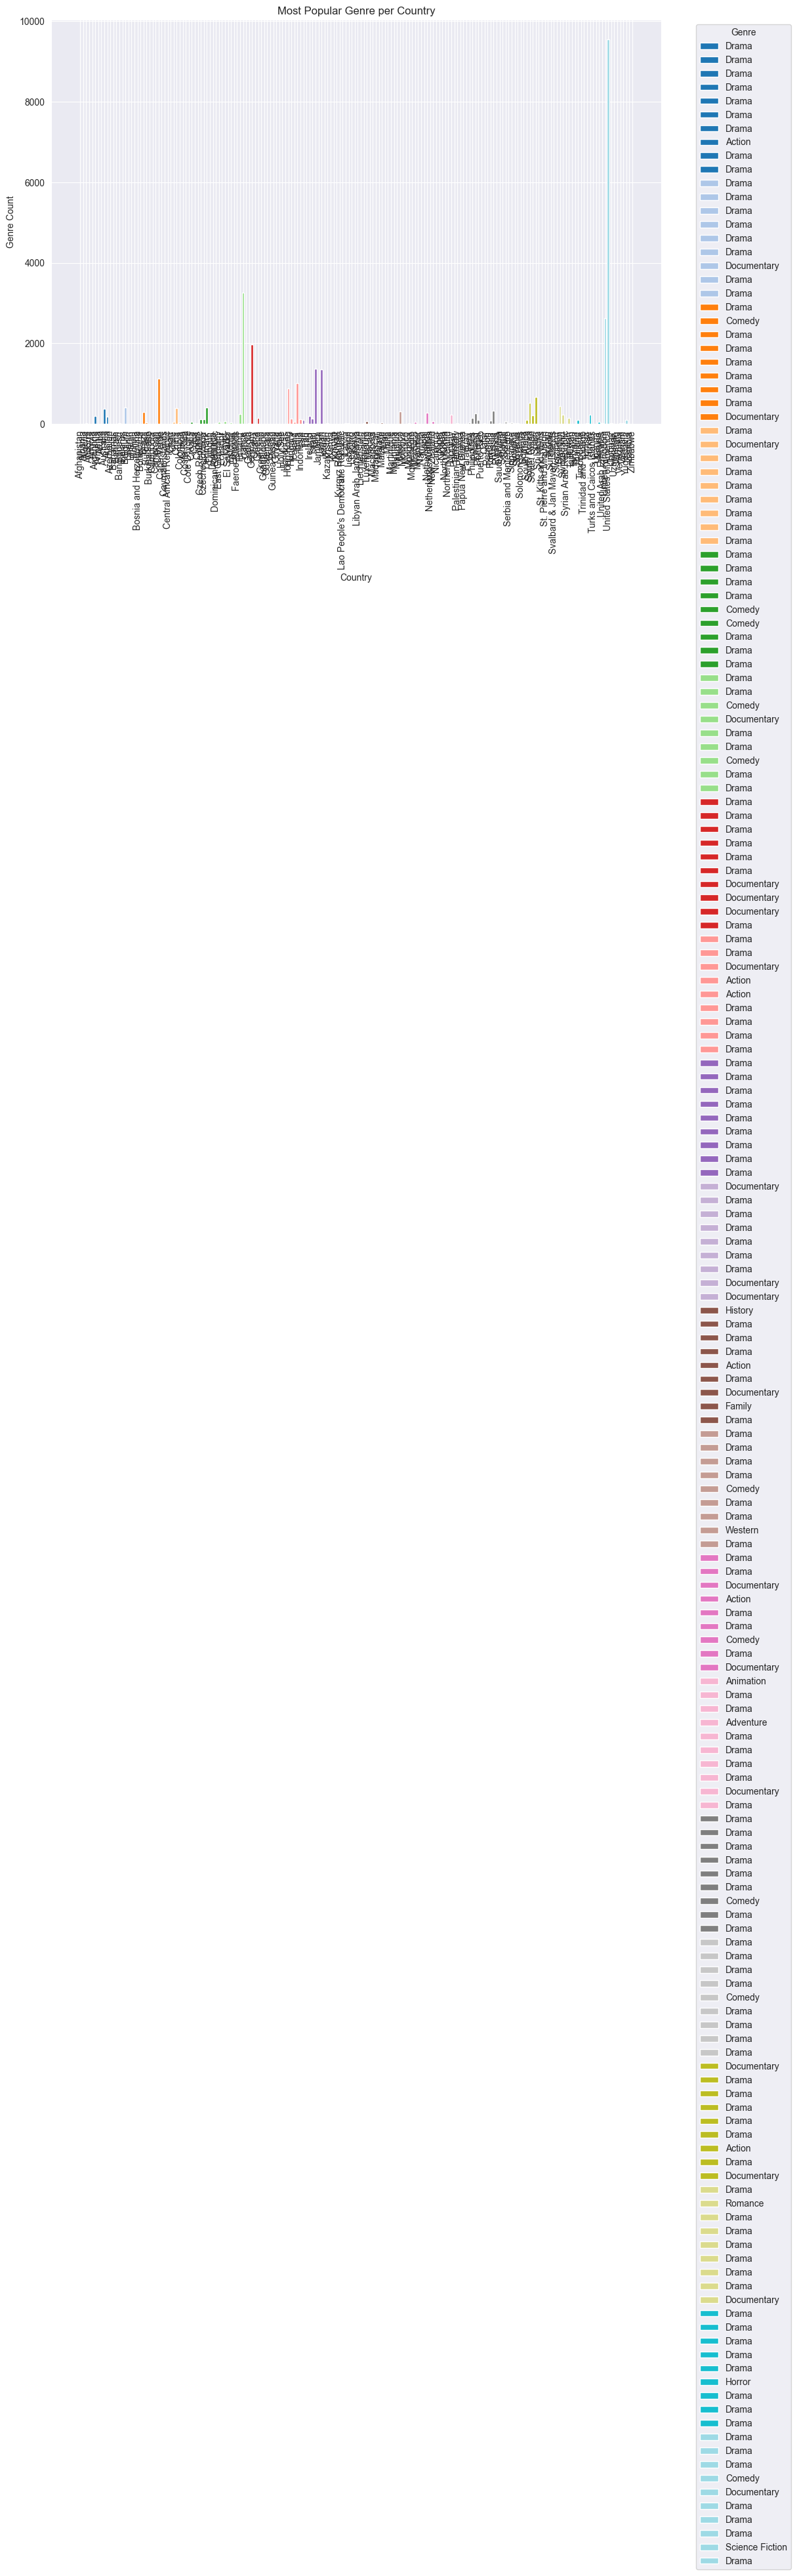

In [9]:
popular_genre_countries =query_db( """
SELECT pc.name AS country, g.name AS genre, COUNT(*) AS genre_count
FROM genres g
JOIN moviegenres mg ON g.id = mg.genre_id
JOIN movieproductioncountries mpc ON mg.movie_id = mpc.movie_id
JOIN productioncountries pc ON mpc.iso_3166_1 = pc.iso_3166_1
GROUP BY pc.name, g.name
ORDER BY pc.name, genre_count DESC;


 """, conn)
top_genre_per_country = popular_genre_countries.groupby('country').apply(lambda x: x.nlargest(1, 'genre_count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

colors = plt.cm.get_cmap('tab20', len(top_genre_per_country['country']))  # Colormap for different countries

for i, row in top_genre_per_country.iterrows():
    country = row['country']
    genre = row['genre']
    count = row['genre_count']
    plt.bar(country, count, color=colors(i), label=genre)

plt.title('Most Popular Genre per Country')
plt.xlabel('Country')
plt.ylabel('Genre Count')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


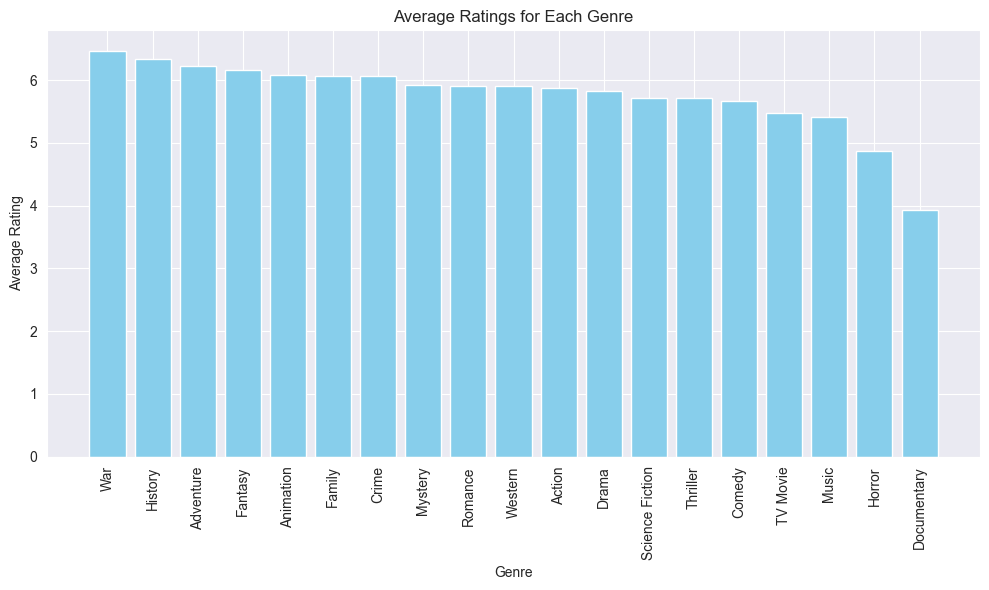

In [10]:
average_popularity_genre= query_db("""
 SELECT g.name AS genre_name, AVG(mp.vote_average) AS avg_vote
    FROM Genres g
    JOIN MovieGenres mg ON g.id = mg.genre_id
    JOIN movies_popularity mp ON mg.movie_id = mp.movie_id
    GROUP BY g.name
    ORDER BY avg_vote DESC
 """, conn)

plt.figure(figsize=(10, 6))
plt.bar(average_popularity_genre.genre_name, average_popularity_genre.avg_vote, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Genre')
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


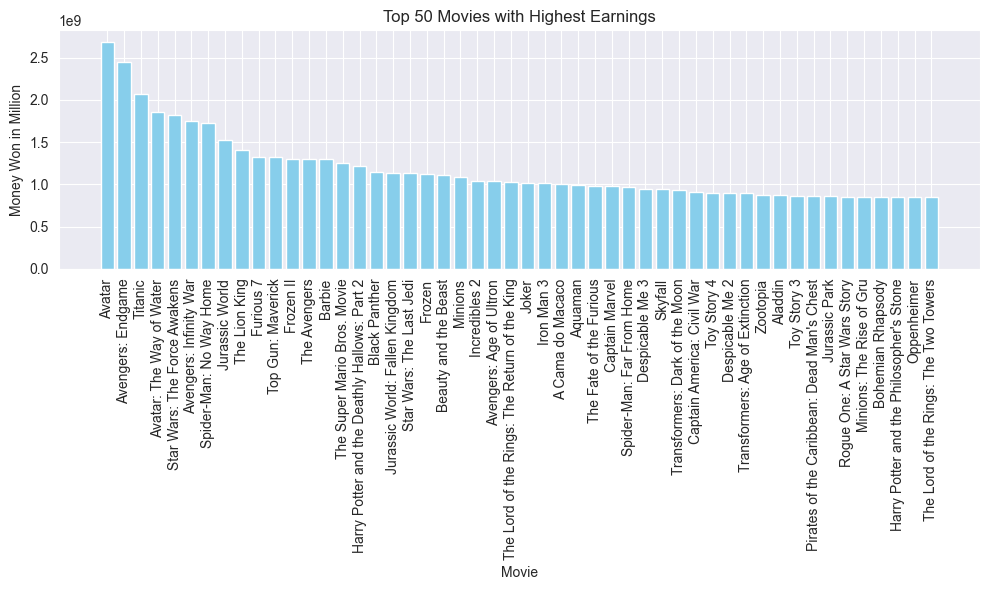

In [11]:
highest_earning= query_db("""
  SELECT title as title, revenue - budget AS profit
  FROM Movies
  ORDER BY profit desc 
  LIMIT 50;
""", conn)


plt.figure(figsize=(10, 6))
plt.bar(highest_earning.title, highest_earning.profit, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Money Won in Million')
plt.title('Top 50 Movies with Highest Earnings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


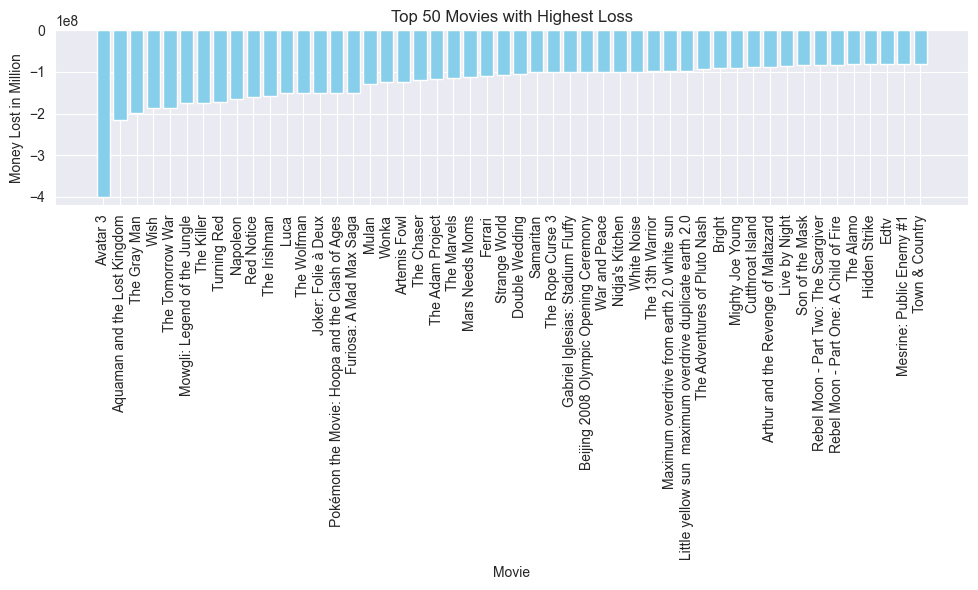

In [12]:
highest_loss= query_db("""
  SELECT title as title, revenue - budget AS profit_loss
  FROM Movies
  ORDER BY profit_loss asc 
  LIMIT 50;
""", conn)


plt.figure(figsize=(10, 6))
plt.bar(highest_loss.title, highest_loss.profit_loss, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Money Lost in Million')
plt.title('Top 50 Movies with Highest Loss')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


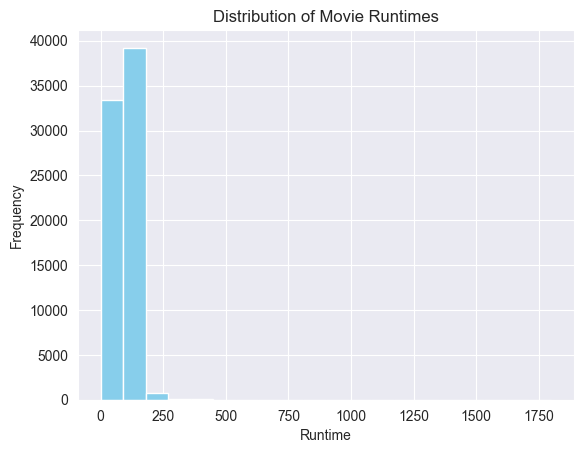

In [13]:
import matplotlib.pyplot as plt

movie_runtimes = query_db("""SELECT runtime FROM Movies""", conn)

plt.hist(movie_runtimes, bins=20, color='skyblue')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


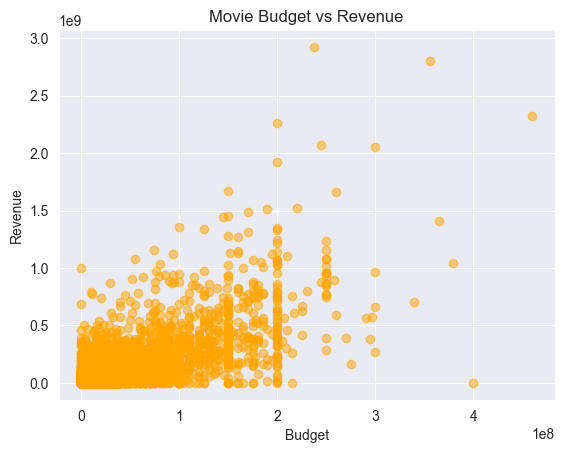

In [30]:
budget_revenue = query_db("""SELECT budget, revenue FROM Movies""", conn)


plt.scatter(budget_revenue.budget, budget_revenue.revenue, alpha=0.5, color='orange')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Movie Budget vs Revenue')
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


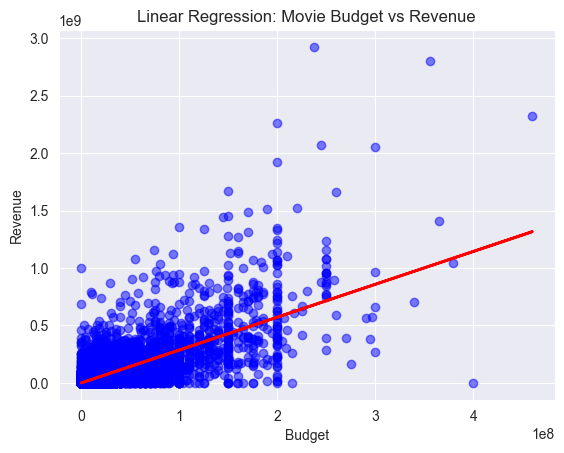

In [32]:
from sklearn.linear_model import LinearRegression

budget_revenue = query_db("""SELECT budget, revenue FROM Movies WHERE budget IS NOT NULL AND revenue IS NOT NULL""", conn)

budget_revenue['budget'] = pd.to_numeric(budget_revenue['budget'])
budget_revenue['revenue'] = pd.to_numeric(budget_revenue['revenue'])

budget = budget_revenue['budget']
revenue = budget_revenue['revenue']

X = np.array(budget).reshape(-1, 1)
y = np.array(revenue)

model = LinearRegression()
model.fit(X, y)

predicted_revenue = model.predict(X)

plt.scatter(budget, revenue, alpha=0.5, color='blue')
plt.plot(budget, predicted_revenue, color='red', linewidth=2)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Linear Regression: Movie Budget vs Revenue')
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


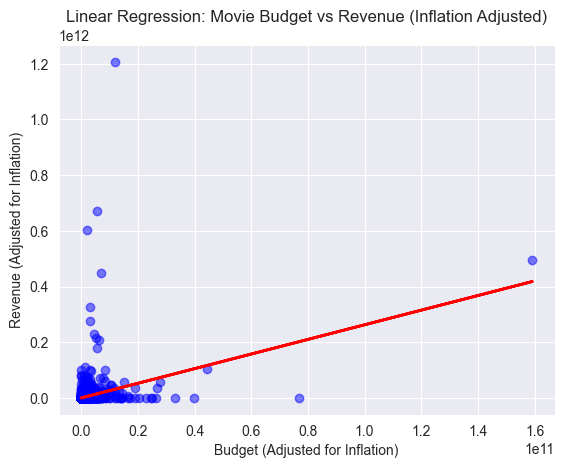

In [52]:
from sklearn.linear_model import LinearRegression

budget_revenue = query_db("""SELECT budget, revenue, release_date FROM Movies 
                             WHERE budget IS NOT NULL AND revenue IS NOT NULL""", conn)

budget_revenue['budget'] = pd.to_numeric(budget_revenue['budget'])
budget_revenue['revenue'] = pd.to_numeric(budget_revenue['revenue'])

inflation_factor = 1.1 
current_year = 2023

budget_revenue['budget_adjusted'] = budget_revenue['budget'] * (inflation_factor ** (current_year - pd.to_datetime(budget_revenue['release_date']).dt.year))
budget_revenue['revenue_adjusted'] = budget_revenue['revenue'] * (inflation_factor ** (current_year - pd.to_datetime(budget_revenue['release_date']).dt.year))

budget_revenue.dropna(subset=['budget_adjusted', 'revenue_adjusted'], inplace=True)

budget_adjusted = budget_revenue['budget_adjusted']
revenue_adjusted = budget_revenue['revenue_adjusted']

X = np.array(budget_adjusted).reshape(-1, 1)
y = np.array(revenue_adjusted)

model = LinearRegression()
model.fit(X, y)

predicted_revenue = model.predict(X)

# Plotting regression line
plt.scatter(budget_adjusted, revenue_adjusted, alpha=0.5, color='blue')
plt.plot(budget_adjusted, predicted_revenue, color='red', linewidth=2)
plt.xlabel('Budget (Adjusted for Inflation)')
plt.ylabel('Revenue (Adjusted for Inflation)')
plt.title('Linear Regression: Movie Budget vs Revenue (Inflation Adjusted)')
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


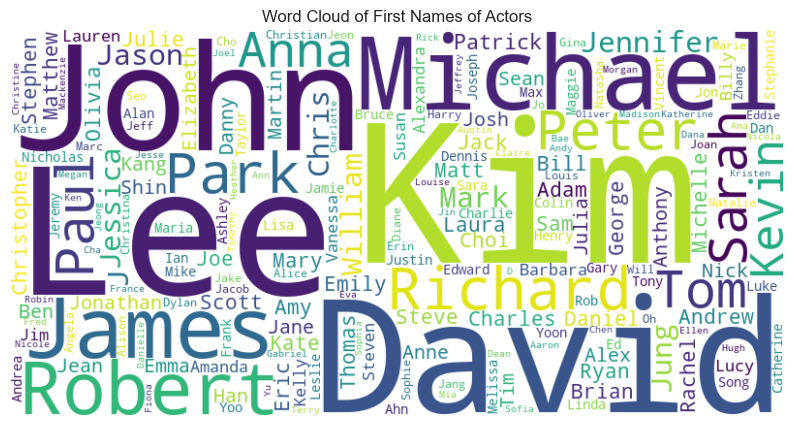

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

first_names_query = query_db("""
    SELECT 
        SPLIT_PART(name, ' ', 1) AS first_name
    FROM 
        people
""", conn)

all_first_names = ' '.join(first_names_query['first_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_first_names)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of First Names of Actors')
plt.show()



C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


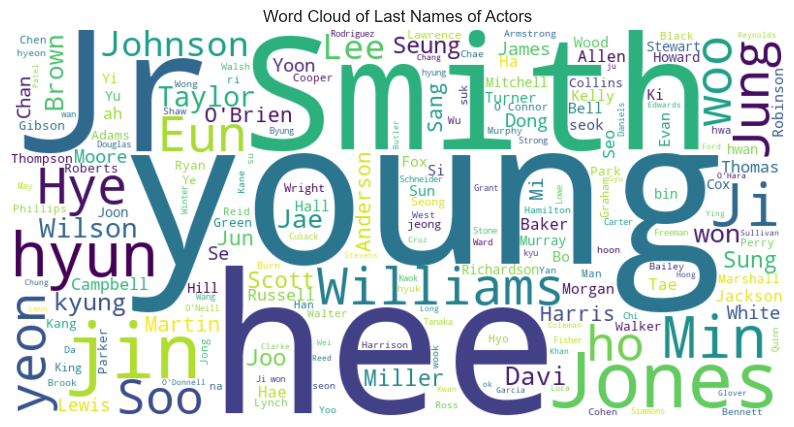

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

first_names_query = query_db("""
    SELECT 
        SPLIT_PART(name, ' ', -1) AS last_name
    FROM 
        people
""", conn)

all_first_names = ' '.join(first_names_query['last_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_first_names)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Last Names of Actors')
plt.show()
